In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14

model_colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
]
benchmark_colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]
bar_colors = [
    "#4a4a4a",
    "#4c72b0",
    "#dd8452",
    "#55a868",
    "#c44e52",
    "#8172b3",
    "#937860",
    "#da8bc3",
]
bar_threshold_colors = [
    "#4c72b0",
    "#dd8452",
    "#55a868",
    "#c44e52",
    "#8172b3",
    "#937860",
    "#da8bc3",
    "#64b5cd",
]
markers = ["o", "s", "^", "D", "v", "p", "h", "*"]


def calc_subplot_layout(n_items, max_cols=4):
    """동적으로 subplot 레이아웃 계산 (rows, cols, figsize)"""
    if n_items == 0:
        return 1, 1, (6, 4)
    cols = min(n_items, max_cols)
    rows = math.ceil(n_items / cols)
    fig_width = 5 * cols
    fig_height = 4.5 * rows
    return rows, cols, (fig_width, fig_height)


def create_dynamic_subplots(n_items, max_cols=4, height_per_row=4.5, width_per_col=5):
    """동적으로 subplot 생성"""
    rows, cols, figsize = calc_subplot_layout(n_items, max_cols)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    # 항상 1D 배열로 반환
    if n_items == 1:
        axes = np.array([axes])
    else:
        axes = np.array(axes).flatten()

    # 사용하지 않는 subplot 숨기기
    for i in range(n_items, len(axes)):
        axes[i].set_visible(False)

    return fig, axes


# Load data
with open("../outputs/leaderboard_rollout.json", "r") as f:
    rollout_data = json.load(f)

with open("../outputs/leaderboard_thinkbrake.json", "r") as f:
    thinkbrake_data = json.load(f)


INCLUDE_MODELS = [
    "Qwen_Qwen3-4B-Thinking-2507",
    # "Qwen_Qwen3-4B",
    "Qwen_Qwen3-14B",
    # "Qwen_Qwen3-32B",
    "deepseek-ai_DeepSeek-R1-Distill-Llama-8B",
    "deepseek-ai_DeepSeek-R1-Distill-Qwen-7B",
    # 'openai_gpt-oss-20b',
]

INCLUDE_BENCHMARKS = [
    "gsm8k",
    "math500",
    "aime2024",
    "aime2025",
    "gpqa-diamond",
    "mmlu-redux",
]

INCLUDE_THRESHOLDS = [
    "0.1",
    "0.25",
    "1.0",
    "2.5",
    # "5.0",
]

model_name_map = {
    "Qwen_Qwen3-4B-Thinking-2507": "Qwen/Qwen3-4B-Thinking-2507",
    "Qwen_Qwen3-4B": "Qwen/Qwen3-4B",
    "Qwen_Qwen3-14B": "Qwen/Qwen3-14B",
    "Qwen_Qwen3-14B": "Qwen/Qwen3-32B",
    "deepseek-ai_DeepSeek-R1-Distill-Llama-8B": "deepseek-ai/DeepSeek-R1-Distill-Llama-8B",
    "deepseek-ai_DeepSeek-R1-Distill-Qwen-7B": "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    "openai_gpt-oss-20b": "openai/gpt-oss-20b",
}

short_names = {
    "Qwen/Qwen3-4B-Thinking-2507": "Qwen3-4B-2507",
    "Qwen/Qwen3-4B": "Qwen3-4B",
    "Qwen/Qwen3-14B": "Qwen3-14B",
    "Qwen/Qwen3-14B": "Qwen3-32B",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B": "DS-R1-8B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "DS-R1-7B",
    "openai/gpt-oss-20b": "GPT-OSS-20B",
}

benchmarks = INCLUDE_BENCHMARKS
# Sort thresholds numerically (ascending order)
thresholds = sorted(INCLUDE_THRESHOLDS, key=lambda x: float(x))

# 실제로 데이터가 있는 모델만 필터링
filtered_rollout_data = {k: v for k, v in rollout_data.items() if k in INCLUDE_MODELS}
filtered_thinkbrake_data = {
    k: v
    for k, v in thinkbrake_data.items()
    if k in [model_name_map.get(m, m) for m in INCLUDE_MODELS]
}
baseline_data = filtered_rollout_data

print("✅ Data loaded and filtered successfully!")
print(f"Included models (rollout): {list(filtered_rollout_data.keys())}")
print(f"Included models (thinkbrake): {list(filtered_thinkbrake_data.keys())}")
print(f"Included benchmarks: {benchmarks}")
print(f"Included thresholds: {thresholds}")

✅ Data loaded and filtered successfully!
Included models (rollout): ['Qwen_Qwen3-4B-Thinking-2507', 'Qwen_Qwen3-14B', 'deepseek-ai_DeepSeek-R1-Distill-Llama-8B', 'Qwen_Qwen3-4B', 'deepseek-ai_DeepSeek-R1-Distill-Qwen-7B']
Included models (thinkbrake): ['Qwen/Qwen3-4B-Thinking-2507', 'Qwen/Qwen3-14B', 'deepseek-ai/DeepSeek-R1-Distill-Llama-8B']
Included benchmarks: ['gsm8k', 'math500', 'aime2024', 'aime2025', 'gpqa-diamond', 'mmlu-redux']
Included thresholds: ['0.1', '0.25', '1.0', '2.5']


## 1. Accuracy by Threshold (per model, per benchmark)
Visualize how accuracy changes as threshold increases for each model


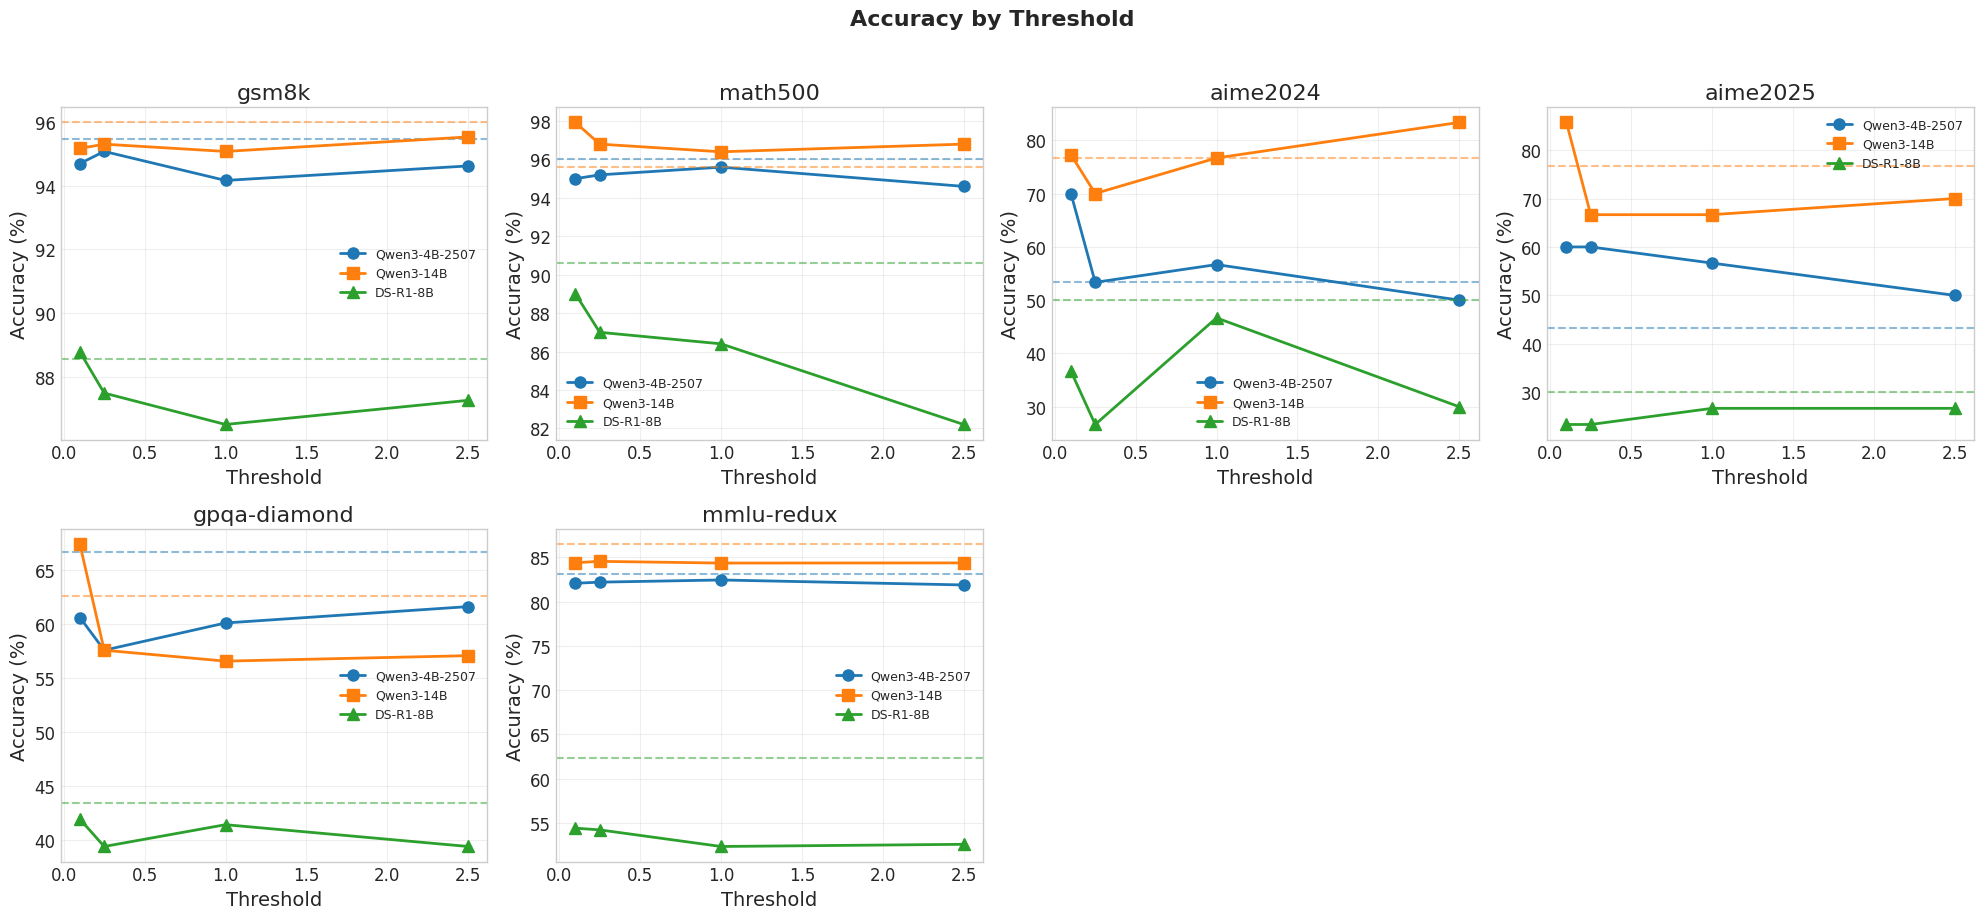

In [2]:
# 동적 레이아웃으로 subplot 생성
n_benchmarks = len(benchmarks)
fig, axes = create_dynamic_subplots(n_benchmarks, max_cols=4)

for idx, benchmark in enumerate(benchmarks):
    ax = axes[idx]

    for model_idx, (model_name, model_data) in enumerate(
        filtered_thinkbrake_data.items()
    ):
        try:
            if benchmark not in model_data:
                continue

            bench_data = model_data[benchmark]
            x_vals = []
            y_vals = []

            for thresh in thresholds:
                key = f"threshold_{thresh}"
                if key in bench_data:
                    x_vals.append(float(thresh))
                    y_vals.append(bench_data[key]["accuracy"])

            if x_vals:
                # ThinkBrake line (solid)
                ax.plot(
                    x_vals,
                    y_vals,
                    marker=markers[model_idx % len(markers)],
                    color=model_colors[model_idx % len(model_colors)],
                    linewidth=2,
                    markersize=8,
                    label=short_names.get(model_name, model_name),
                )

                # Add baseline horizontal line (dashed)
                # Find corresponding rollout name
                for rollout_name in filtered_rollout_data:
                    if model_name_map.get(rollout_name) == model_name:
                        if benchmark in filtered_rollout_data[rollout_name]:
                            baseline_acc = filtered_rollout_data[rollout_name][
                                benchmark
                            ]["accuracy"]
                            ax.axhline(
                                y=baseline_acc,
                                color=model_colors[model_idx % len(model_colors)],
                                linestyle="--",
                                alpha=0.5,
                                linewidth=1.5,
                            )
                        break
        except Exception:
            continue

    ax.set_xlabel("Threshold")
    ax.set_ylabel("Accuracy (%)")
    ax.set_title(f"{benchmark}")
    ax.legend(loc="best", fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle("Accuracy by Threshold", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

## 2. Token Savings by Threshold
Observe how token savings (%) increases as threshold increases (higher = more efficient)


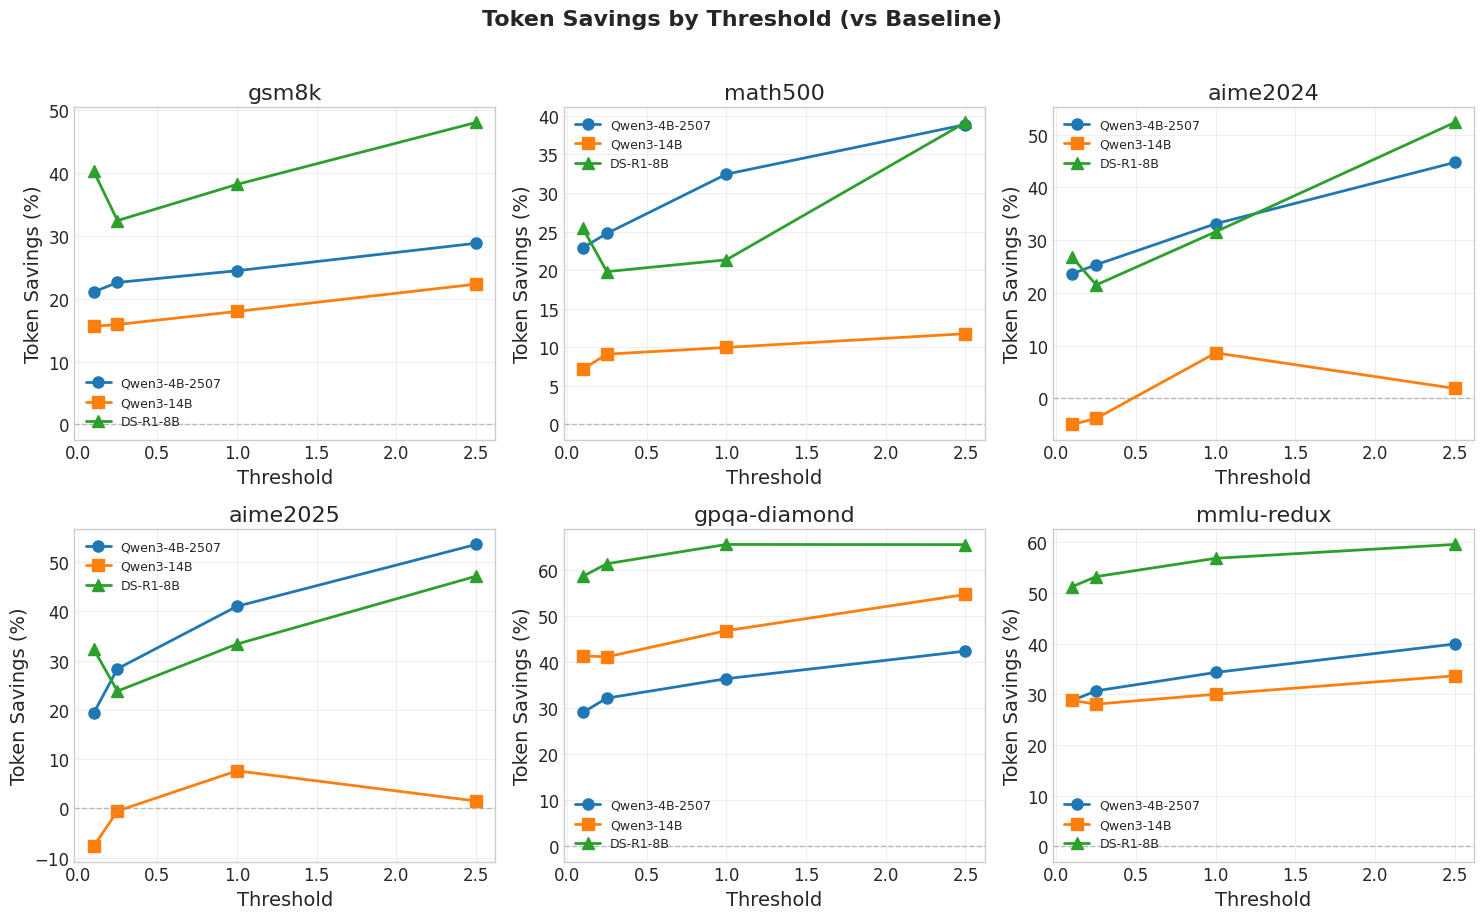

In [3]:
n_benchmarks = len(benchmarks)
fig, axes = create_dynamic_subplots(n_benchmarks, max_cols=3)

for idx, benchmark in enumerate(benchmarks):
    ax = axes[idx]

    for model_idx, (model_name, model_data) in enumerate(
        filtered_thinkbrake_data.items()
    ):
        try:
            if benchmark not in model_data:
                continue

            # Find baseline token length for this model/benchmark
            baseline_tokens = None
            for rollout_name in filtered_rollout_data:
                if model_name_map.get(rollout_name) == model_name:
                    if benchmark in filtered_rollout_data[rollout_name]:
                        baseline_tokens = filtered_rollout_data[rollout_name][
                            benchmark
                        ]["avg_token_length"]
                    break

            if baseline_tokens is None:
                continue

            bench_data = model_data[benchmark]
            x_vals = []
            y_vals = []

            for thresh in thresholds:
                key = f"threshold_{thresh}"
                if key in bench_data:
                    x_vals.append(float(thresh))
                    # Calculate token savings % (higher = more efficient)
                    token_savings = (
                        1 - bench_data[key]["avg_token_length"] / baseline_tokens
                    ) * 100
                    y_vals.append(token_savings)

            if x_vals:
                # ThinkBrake line (solid)
                ax.plot(
                    x_vals,
                    y_vals,
                    marker=markers[model_idx % len(markers)],
                    color=model_colors[model_idx % len(model_colors)],
                    linewidth=2,
                    markersize=8,
                    label=short_names.get(model_name, model_name),
                )
        except Exception:
            continue

    ax.axhline(y=0, color="gray", linestyle="--", alpha=0.5, linewidth=1)
    ax.set_xlabel("Threshold")
    ax.set_ylabel("Token Savings (%)")
    ax.set_title(f"{benchmark}")
    ax.legend(loc="best", fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle(
    "Token Savings by Threshold (vs Baseline)", fontsize=16, fontweight="bold", y=1.02
)
plt.tight_layout()
plt.show()

## 7. Average Performance by Model (Bar Chart)
Compare average accuracy across all benchmarks for each model


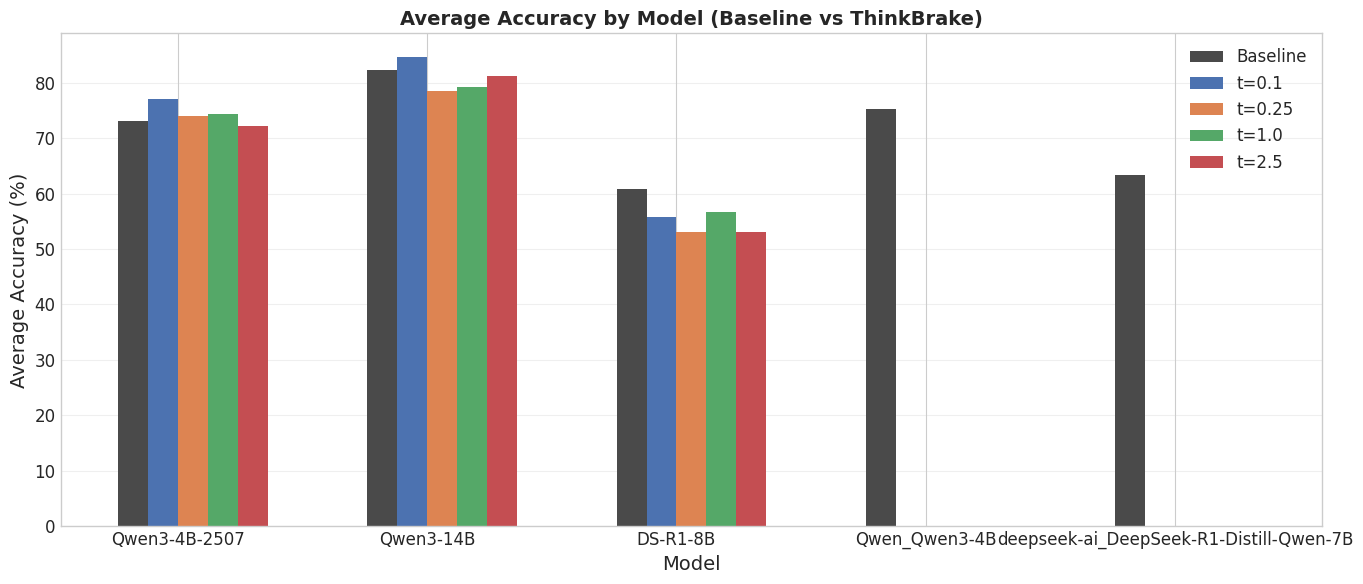

In [4]:
# Calculate average accuracy by model and threshold
avg_data = []

for rollout_name, rollout_model_data in filtered_rollout_data.items():
    try:
        mapped_name = model_name_map.get(rollout_name, rollout_name)
        display_name = short_names.get(mapped_name, rollout_name)

        # Baseline average
        baseline_accs = []
        for b in benchmarks:
            try:
                if b in rollout_model_data:
                    baseline_accs.append(rollout_model_data[b]["accuracy"])
            except Exception:
                pass

        if baseline_accs:
            avg_data.append(
                {
                    "model": display_name,
                    "type": "Baseline",
                    "avg_accuracy": np.mean(baseline_accs),
                }
            )

        # ThinkBrake average for each threshold
        if mapped_name in filtered_thinkbrake_data:
            for thresh in thresholds:
                tb_accs = []
                for benchmark in benchmarks:
                    try:
                        if benchmark in filtered_thinkbrake_data[mapped_name]:
                            key = f"threshold_{thresh}"
                            if key in filtered_thinkbrake_data[mapped_name][benchmark]:
                                tb_accs.append(
                                    filtered_thinkbrake_data[mapped_name][benchmark][
                                        key
                                    ]["accuracy"]
                                )
                    except Exception:
                        pass
                if tb_accs:
                    avg_data.append(
                        {
                            "model": display_name,
                            "type": f"t={thresh}",
                            "avg_accuracy": np.mean(tb_accs),
                        }
                    )
    except Exception:
        continue

if avg_data:
    df_avg = pd.DataFrame(avg_data)

    # Grouped bar chart
    fig, ax = plt.subplots(figsize=(14, 6))

    models = df_avg["model"].unique()
    types = df_avg["type"].unique()
    x = np.arange(len(models))
    width = 0.12

    for i, t in enumerate(types):
        try:
            type_data = df_avg[df_avg["type"] == t]
            values = [
                (
                    type_data[type_data["model"] == m]["avg_accuracy"].values[0]
                    if len(type_data[type_data["model"] == m]) > 0
                    else 0
                )
                for m in models
            ]
            ax.bar(
                x + i * width,
                values,
                width,
                label=t,
                color=bar_colors[i % len(bar_colors)],
            )
        except Exception:
            continue

    ax.set_xlabel("Model")
    ax.set_ylabel("Average Accuracy (%)")
    ax.set_title(
        "Average Accuracy by Model (Baseline vs ThinkBrake)",
        fontsize=14,
        fontweight="bold",
    )
    ax.set_xticks(x + width * 1.5)
    ax.set_xticklabels(models)
    ax.legend()
    ax.grid(True, alpha=0.3, axis="y")

    plt.tight_layout()
    plt.show()
else:
    print("No data available for this plot.")

## Per-Model Analysis: Token Savings across Benchmarks
Each subplot shows one model's token savings (%) at different thresholds for all benchmarks (higher = more efficient)


/tmp/ipykernel_2542058/777805303.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best", fontsize=9)


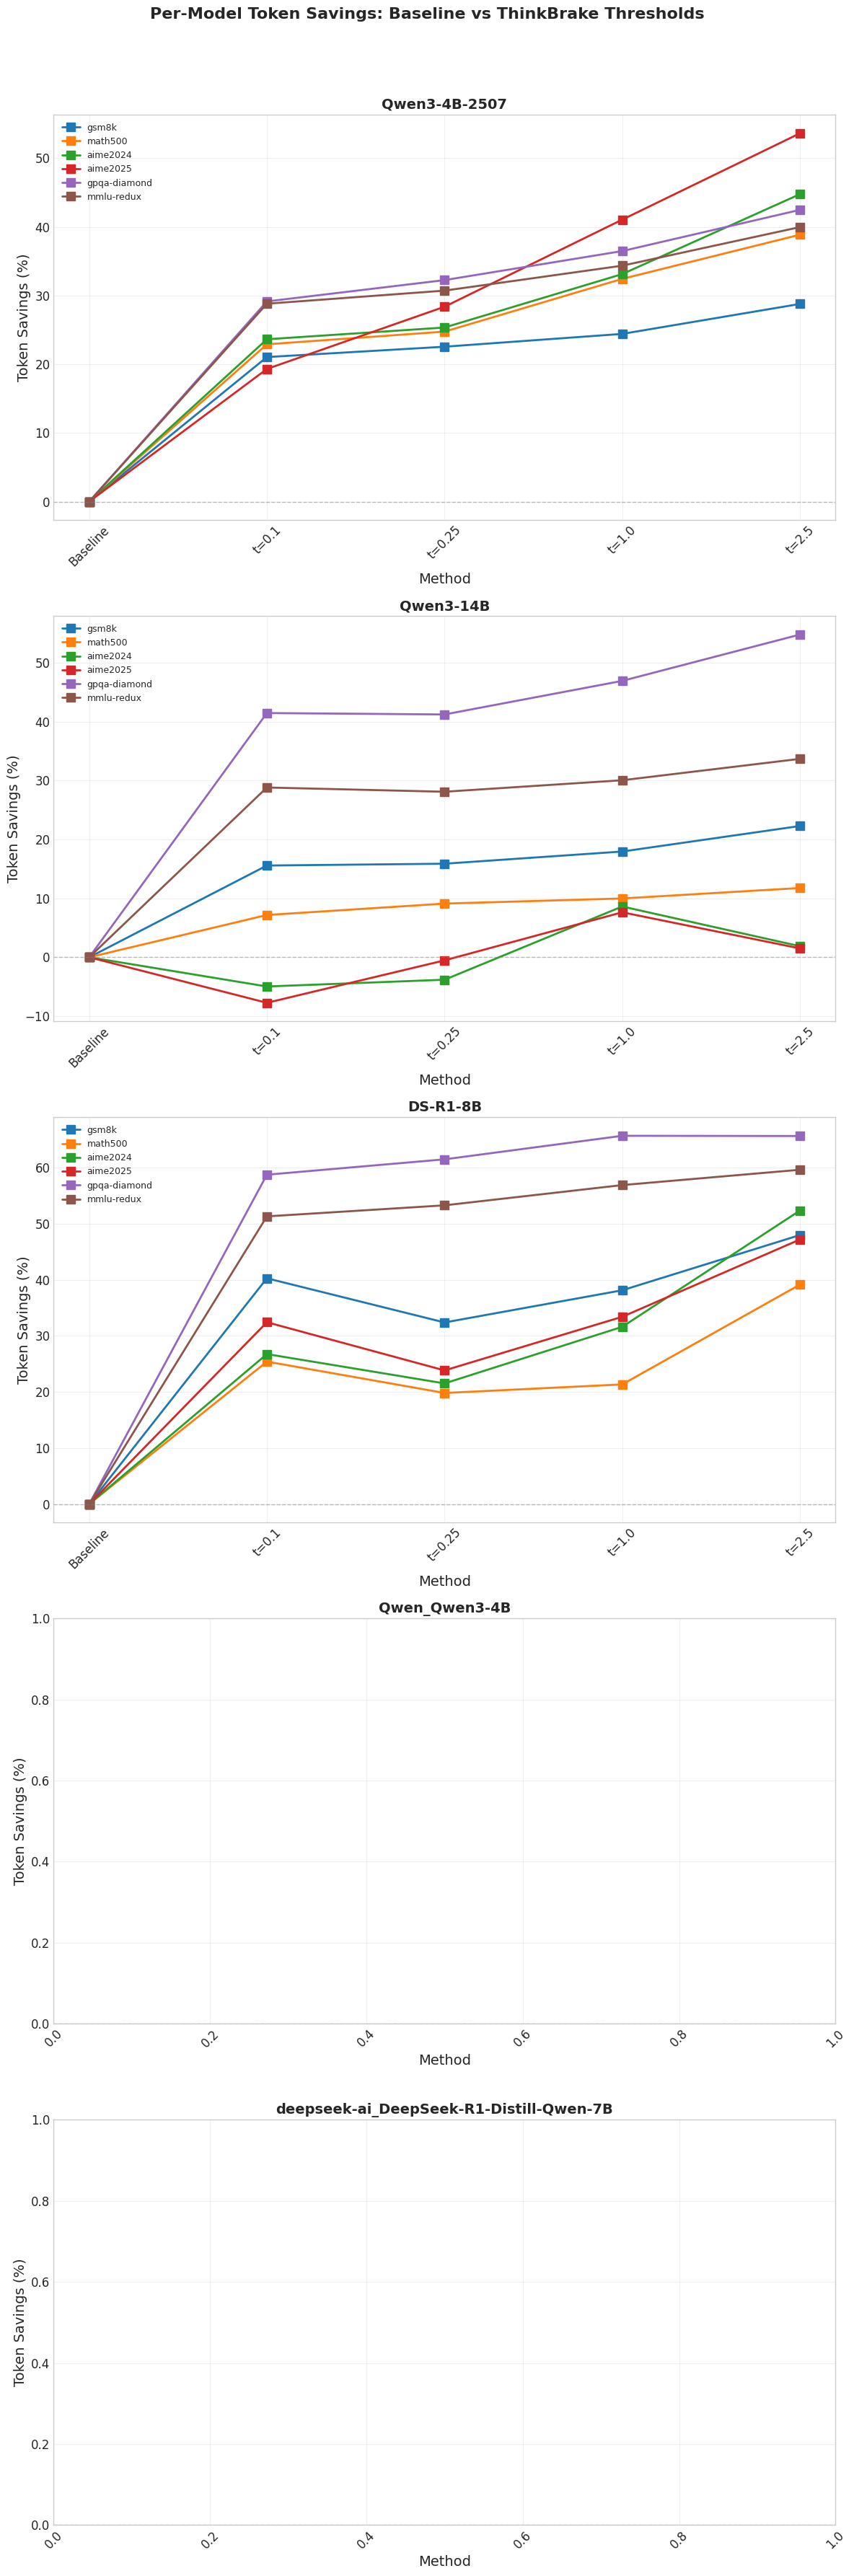

In [5]:
# Per-model token savings comparison across benchmarks
num_models = len(filtered_rollout_data)
if num_models == 0:
    print("No data available for this plot.")
else:
    fig, axes = plt.subplots(num_models, 1, figsize=(12, 7 * num_models))
    if num_models == 1:
        axes = [axes]

    for model_idx, (rollout_name, rollout_model_data) in enumerate(
        filtered_rollout_data.items()
    ):
        ax = axes[model_idx]
        mapped_name = model_name_map.get(rollout_name, rollout_name)
        display_name = short_names.get(mapped_name, rollout_name)

        for bench_idx, benchmark in enumerate(benchmarks):
            try:
                if benchmark not in rollout_model_data:
                    continue

                # Baseline
                baseline_tokens = rollout_model_data[benchmark]["avg_token_length"]

                # ThinkBrake data
                if (
                    mapped_name in filtered_thinkbrake_data
                    and benchmark in filtered_thinkbrake_data[mapped_name]
                ):
                    tb_data = filtered_thinkbrake_data[mapped_name][benchmark]
                    x_vals = ["Baseline"]
                    y_vals = [0]  # Baseline = 0% savings

                    for thresh in thresholds:
                        key = f"threshold_{thresh}"
                        if key in tb_data:
                            x_vals.append(f"t={thresh}")
                            # Calculate token savings % (higher = more efficient)
                            token_savings = (
                                1 - tb_data[key]["avg_token_length"] / baseline_tokens
                            ) * 100
                            y_vals.append(token_savings)

                    ax.plot(
                        x_vals,
                        y_vals,
                        marker="s",
                        linewidth=2,
                        markersize=8,
                        color=benchmark_colors[bench_idx % len(benchmark_colors)],
                        label=benchmark,
                    )
            except Exception:
                continue

        ax.axhline(y=0, color="gray", linestyle="--", alpha=0.5, linewidth=1)
        ax.set_xlabel("Method")
        ax.set_ylabel("Token Savings (%)")
        ax.set_title(f"{display_name}", fontsize=14, fontweight="bold")
        ax.legend(loc="best", fontsize=9)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis="x", rotation=45)

    plt.suptitle(
        "Per-Model Token Savings: Baseline vs ThinkBrake Thresholds",
        fontsize=16,
        fontweight="bold",
        y=1.02,
    )
    plt.tight_layout()
    plt.show()

## Per-Model Bar Chart: Accuracy by Benchmark
Bar chart showing accuracy for each benchmark grouped by threshold (per model)


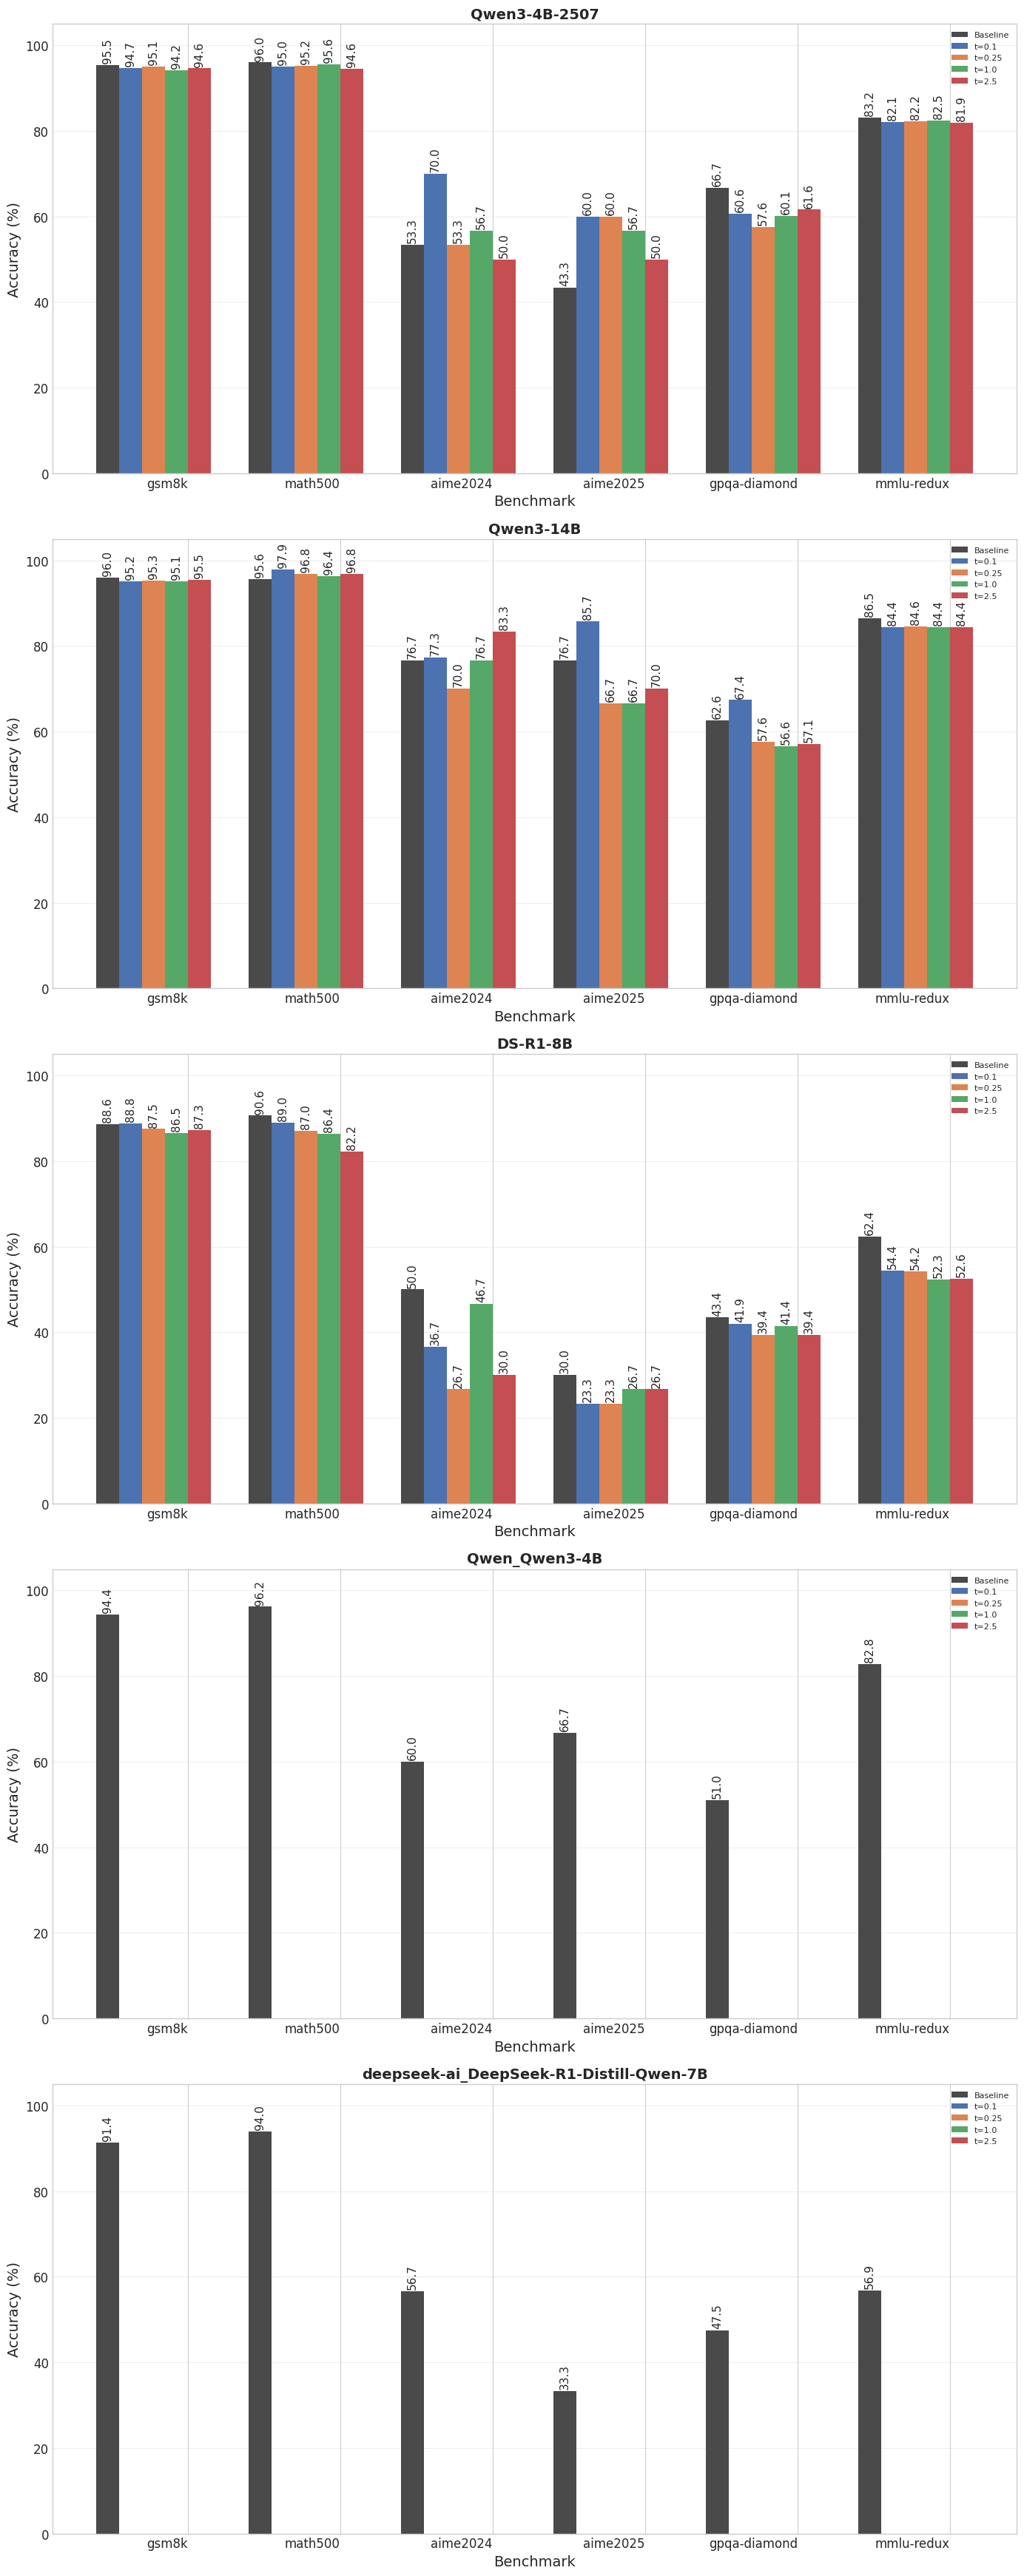

In [6]:
# Per-model bar chart: Accuracy by benchmark
num_models = len(filtered_rollout_data)
if num_models == 0:
    print("No data available for this plot.")
else:
    fig, axes = plt.subplots(num_models, 1, figsize=(14, 7 * num_models))
    if num_models == 1:
        axes = [axes]

    methods = ["Baseline"] + [f"t={t}" for t in thresholds]

    for model_idx, (rollout_name, rollout_model_data) in enumerate(
        filtered_rollout_data.items()
    ):
        ax = axes[model_idx]
        mapped_name = model_name_map.get(rollout_name, rollout_name)
        display_name = short_names.get(mapped_name, rollout_name)

        # Collect data for this model
        model_benchmarks = []
        model_accuracies = {m: [] for m in methods}

        for benchmark in benchmarks:
            try:
                if benchmark not in rollout_model_data:
                    continue

                model_benchmarks.append(benchmark)

                # Baseline
                model_accuracies["Baseline"].append(
                    rollout_model_data[benchmark]["accuracy"]
                )

                # ThinkBrake thresholds
                if (
                    mapped_name in filtered_thinkbrake_data
                    and benchmark in filtered_thinkbrake_data[mapped_name]
                ):
                    tb_data = filtered_thinkbrake_data[mapped_name][benchmark]
                    for thresh in thresholds:
                        key = f"threshold_{thresh}"
                        if key in tb_data:
                            model_accuracies[f"t={thresh}"].append(
                                tb_data[key]["accuracy"]
                            )
                        else:
                            model_accuracies[f"t={thresh}"].append(0)
                else:
                    for t in thresholds:
                        model_accuracies[f"t={t}"].append(0)
            except Exception:
                continue

        # Plot grouped bars
        if model_benchmarks:
            x = np.arange(len(model_benchmarks))
            width = 0.15

            for i, method in enumerate(methods):
                try:
                    if model_accuracies[method]:
                        bars = ax.bar(
                            x + i * width,
                            model_accuracies[method],
                            width,
                            label=method,
                            color=bar_colors[i % len(bar_colors)],
                        )
                        # Add value labels on bars
                        for bar, val in zip(bars, model_accuracies[method]):
                            if val > 0:
                                ax.text(
                                    bar.get_x() + bar.get_width() / 2,
                                    bar.get_height() + 0.5,
                                    f"{val:.1f}",
                                    ha="center",
                                    va="bottom",
                                    fontsize=11,
                                    rotation=90,
                                )
                except Exception:
                    continue

            ax.set_xlabel("Benchmark")
            ax.set_ylabel("Accuracy (%)")
            ax.set_title(f"{display_name}", fontsize=14, fontweight="bold")
            ax.set_xticks(x + width * 3.5)
            ax.set_xticklabels(model_benchmarks, ha="right")
            ax.legend(loc="upper right", fontsize=8)
            ax.grid(True, alpha=0.3, axis="y")
            ax.set_ylim(0, 105)

    plt.tight_layout()
    plt.show()

## Method Comparison: ThinkBrake vs Thinkless

In [7]:
try:
    with open("../outputs/leaderboard_thinkless.json", "r") as f:
        thinkless_data = json.load(f)

    filtered_thinkless_data = {}
    for model_key in INCLUDE_MODELS:
        if model_key in thinkless_data:
            filtered_thinkless_data[model_key] = thinkless_data[model_key]
        mapped_name = model_name_map.get(model_key, model_key)
        if mapped_name in thinkless_data:
            filtered_thinkless_data[model_key] = thinkless_data[mapped_name]
except FileNotFoundError:
    filtered_thinkless_data = {}

### Accuracy Comparison: Baseline vs Methods

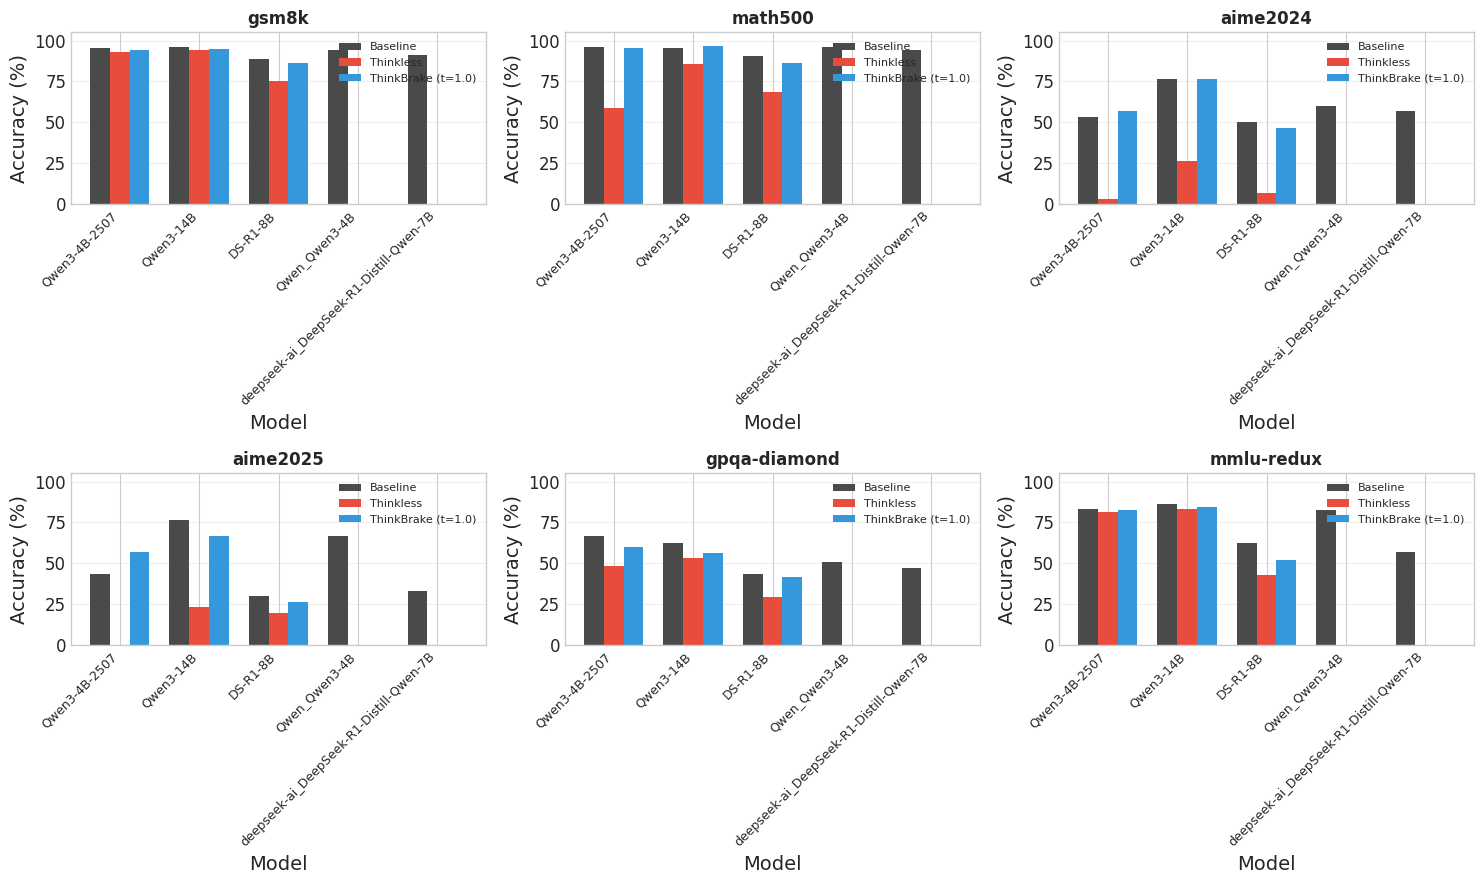

In [8]:
if filtered_thinkless_data:
    best_threshold = "1.0"
    n_benchmarks = len(benchmarks)
    fig, axes = create_dynamic_subplots(n_benchmarks, max_cols=3)

    method_colors = {
        "Baseline": "#4a4a4a",
        "Thinkless": "#e74c3c",
        "ThinkBrake": "#3498db",
    }

    for idx, benchmark in enumerate(benchmarks):
        ax = axes[idx]

        models_list = []
        baseline_accs = []
        thinkless_accs = []
        thinkbrake_accs = []

        for rollout_name in filtered_rollout_data:
            mapped_name = model_name_map.get(rollout_name, rollout_name)
            display_name = short_names.get(mapped_name, rollout_name)

            try:
                # Baseline accuracy
                if benchmark in filtered_rollout_data[rollout_name]:
                    baseline_acc = filtered_rollout_data[rollout_name][benchmark][
                        "accuracy"
                    ]
                else:
                    continue

                # Thinkless accuracy
                thinkless_acc = None
                if (
                    rollout_name in filtered_thinkless_data
                    and benchmark in filtered_thinkless_data[rollout_name]
                ):
                    thinkless_acc = filtered_thinkless_data[rollout_name][benchmark][
                        "accuracy"
                    ]

                # ThinkBrake accuracy (best threshold)
                thinkbrake_acc = None
                if (
                    mapped_name in filtered_thinkbrake_data
                    and benchmark in filtered_thinkbrake_data[mapped_name]
                ):
                    key = f"threshold_{best_threshold}"
                    if key in filtered_thinkbrake_data[mapped_name][benchmark]:
                        thinkbrake_acc = filtered_thinkbrake_data[mapped_name][
                            benchmark
                        ][key]["accuracy"]

                models_list.append(display_name)
                baseline_accs.append(baseline_acc)
                thinkless_accs.append(thinkless_acc if thinkless_acc else 0)
                thinkbrake_accs.append(thinkbrake_acc if thinkbrake_acc else 0)
            except Exception:
                continue

        if models_list:
            x = np.arange(len(models_list))
            width = 0.25

            ax.bar(
                x - width,
                baseline_accs,
                width,
                label="Baseline",
                color=method_colors["Baseline"],
            )
            ax.bar(
                x,
                thinkless_accs,
                width,
                label="Thinkless",
                color=method_colors["Thinkless"],
            )
            ax.bar(
                x + width,
                thinkbrake_accs,
                width,
                label=f"ThinkBrake (t={best_threshold})",
                color=method_colors["ThinkBrake"],
            )

            ax.set_xlabel("Model")
            ax.set_ylabel("Accuracy (%)")
            ax.set_title(f"{benchmark}", fontsize=12, fontweight="bold")
            ax.set_xticks(x)
            ax.set_xticklabels(models_list, rotation=45, ha="right", fontsize=9)
            ax.legend(loc="best", fontsize=8)
            ax.grid(True, alpha=0.3, axis="y")
            ax.set_ylim(0, 105)

    plt.tight_layout()
    plt.show()

### Token Efficiency Comparison

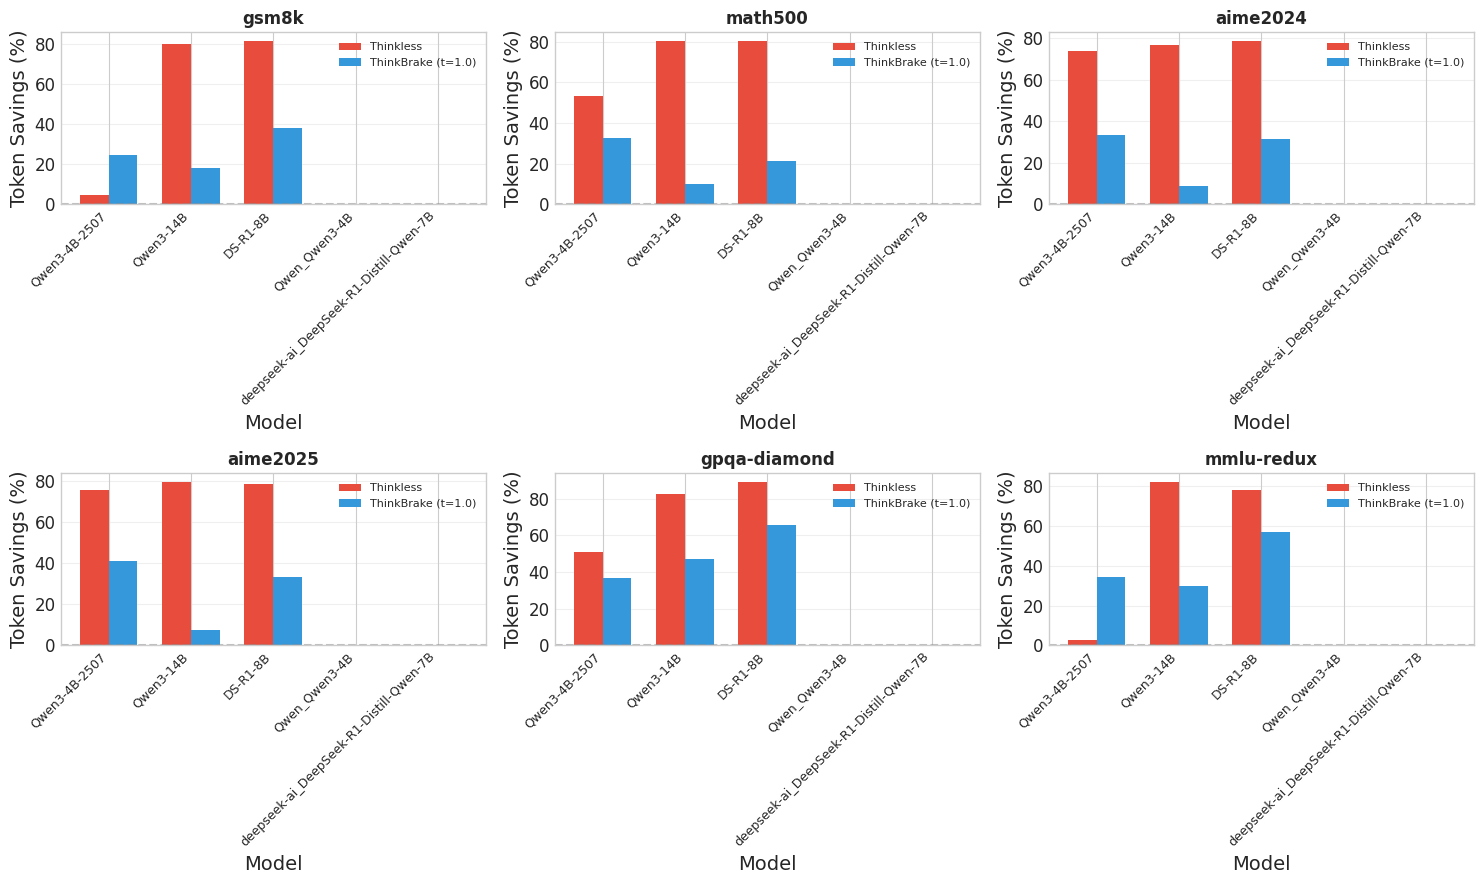

In [9]:
if filtered_thinkless_data:
    best_threshold = "1.0"

    n_benchmarks = len(benchmarks)
    fig, axes = create_dynamic_subplots(n_benchmarks, max_cols=3)

    method_colors = {"Thinkless": "#e74c3c", "ThinkBrake": "#3498db"}

    for idx, benchmark in enumerate(benchmarks):
        ax = axes[idx]

        models_list = []
        thinkless_savings = []
        thinkbrake_savings = []

        for rollout_name in filtered_rollout_data:
            mapped_name = model_name_map.get(rollout_name, rollout_name)
            display_name = short_names.get(mapped_name, rollout_name)

            try:
                # Baseline token length
                if benchmark in filtered_rollout_data[rollout_name]:
                    baseline_tokens = filtered_rollout_data[rollout_name][benchmark][
                        "avg_token_length"
                    ]
                else:
                    continue

                # Thinkless token savings
                thinkless_saving = None
                if (
                    rollout_name in filtered_thinkless_data
                    and benchmark in filtered_thinkless_data[rollout_name]
                ):
                    thinkless_tokens = filtered_thinkless_data[rollout_name][benchmark][
                        "avg_token_length"
                    ]
                    thinkless_saving = (1 - thinkless_tokens / baseline_tokens) * 100

                # ThinkBrake token savings
                thinkbrake_saving = None
                if (
                    mapped_name in filtered_thinkbrake_data
                    and benchmark in filtered_thinkbrake_data[mapped_name]
                ):
                    key = f"threshold_{best_threshold}"
                    if key in filtered_thinkbrake_data[mapped_name][benchmark]:
                        thinkbrake_tokens = filtered_thinkbrake_data[mapped_name][
                            benchmark
                        ][key]["avg_token_length"]
                        thinkbrake_saving = (
                            1 - thinkbrake_tokens / baseline_tokens
                        ) * 100

                models_list.append(display_name)
                thinkless_savings.append(thinkless_saving if thinkless_saving else 0)
                thinkbrake_savings.append(thinkbrake_saving if thinkbrake_saving else 0)
            except Exception:
                continue

        if models_list:
            x = np.arange(len(models_list))
            width = 0.35

            ax.bar(
                x - width / 2,
                thinkless_savings,
                width,
                label="Thinkless",
                color=method_colors["Thinkless"],
            )
            ax.bar(
                x + width / 2,
                thinkbrake_savings,
                width,
                label=f"ThinkBrake (t={best_threshold})",
                color=method_colors["ThinkBrake"],
            )

            ax.axhline(y=0, color="gray", linestyle="--", alpha=0.5)
            ax.set_xlabel("Model")
            ax.set_ylabel("Token Savings (%)")
            ax.set_title(f"{benchmark}", fontsize=12, fontweight="bold")
            ax.set_xticks(x)
            ax.set_xticklabels(models_list, rotation=45, ha="right", fontsize=9)
            ax.legend(loc="best", fontsize=8)
            ax.grid(True, alpha=0.3, axis="y")

    plt.tight_layout()
    plt.show()